In ```Celebrity_Face_Recognition``` file we were able to implement Neural Networks onto a celebrity image data set containing 105 catagories. This file is to load the saved model and test it with a test image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
import os
import tensorflow as tf

In [2]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = tf.keras.models.model_from_json(loaded_model_json)

# load weights into new model
model.load_weights("model.h5")
print("model loaded from disk")

with open('class_indices.pkl', 'rb') as f:
    class_indices = pickle.load(f)
print("class indices loaded from disk")

model loaded from disk
class indices loaded from disk


In [3]:
test_dir = # test image path
rows = 160
cols = 160

Lets test the image Johnny Depp243_1874.jpg


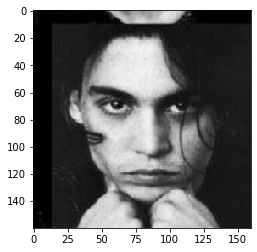

Algorithm predicted that the Person in the Image is Johnny Depp .


In [4]:
import random
random_name = random.choice(os.listdir(test_dir))
random_image = random.choice(os.listdir(os.path.join(test_dir, random_name)))
print(f"Lets test the image " + random_image)

path = os.path.join(test_dir, random_name, random_image)  #Path to the target image to be predicted. 

class_names = list(class_indices.keys())   #List of the class names
img = tf.keras.preprocessing.image.load_img(path, target_size=(rows, cols))

plt.figure()
plt.imshow(img) 
plt.show()


img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
img_array=img_array/255.

score = model.predict(img_array)

print("Algorithm predicted that the Person in the Image is {} .".format(class_names[np.argmax(score)][5:].title()))